In [1]:
import numpy as np
import pandas as pd

In [2]:
url="https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df=pd.read_csv(url)
print(df.head())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82           Chicago   

  Language  Clicks  Impressions  Engagement_Score  Custo

In [4]:
df.shape

(22029, 16)

In [5]:
df.info

<bound method DataFrame.info of        Campaign_ID              Company Campaign_Type Target_Audience  \
0                1             TechCorp         Email     Women 25-34   
1                2  Innovate Industries    Influencer     Women 35-44   
2                3       NexGen Systems  Social Media     Women 25-34   
3                4  Innovate Industries         Email     Women 25-34   
4                5  Data Tech Solutions    Influencer       Men 25-34   
...            ...                  ...           ...             ...   
22024        22025  Data Tech Solutions        Search       Men 18-24   
22025        22026  Data Tech Solutions  Social Media       Men 18-24   
22026        22027             TechCorp    Influencer     Women 25-34   
22027        22028  Data Tech Solutions        Search       Men 18-24   
22028        22029       NexGen Systems        Search       Men 18-24   

      Duration Channel_Used  Conversion_Rate  Acquisition_Cost     ROI  \
0      30 days   

In [6]:
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


In [7]:
df['Campaign_ID'].nunique()

22029

In [8]:
df['Location'].unique()
df['Customer_Segment'].unique()

<StringArray>
[   'Tech Enthusiasts',             'Foodies',        'Fashionistas',
 'Outdoor Adventurers',   'Health & Wellness']
Length: 5, dtype: str

In [9]:
df['Campaign_Type'].value_counts()
df['Channel_Used'].value_counts()

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

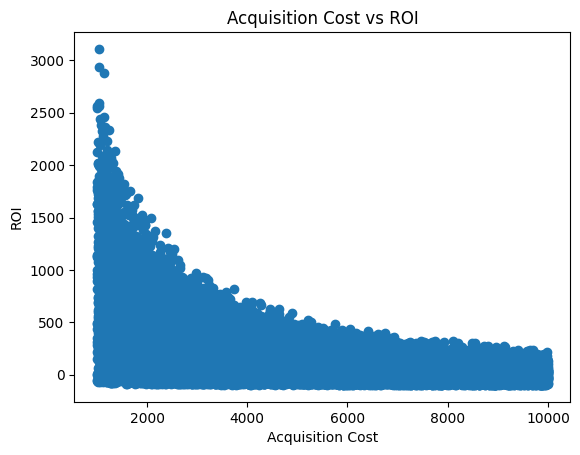

In [11]:
plt.scatter(df['Acquisition_Cost'], df['ROI'])
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.title('Acquisition Cost vs ROI')
plt.show()

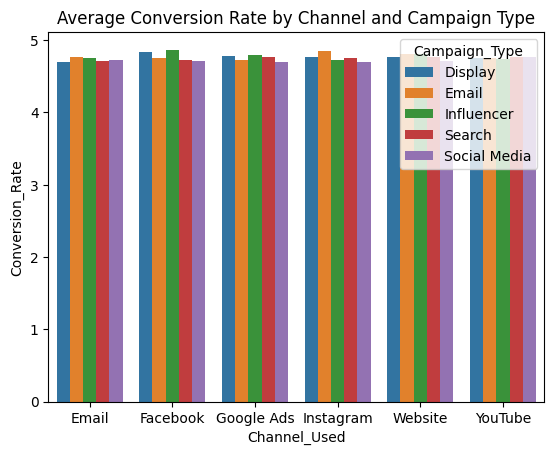

In [12]:
avg_conv = df.groupby(['Channel_Used', 'Campaign_Type'])['Conversion_Rate'].mean().reset_index()


sns.barplot(data=avg_conv, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type')
plt.title('Average Conversion Rate by Channel and Campaign Type')
plt.show()

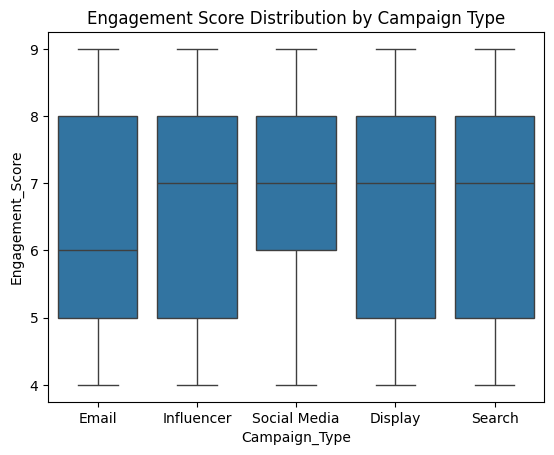

In [13]:
sns.boxplot(data=df, x='Campaign_Type', y='Engagement_Score')
plt.title('Engagement Score Distribution by Campaign Type')
plt.show()

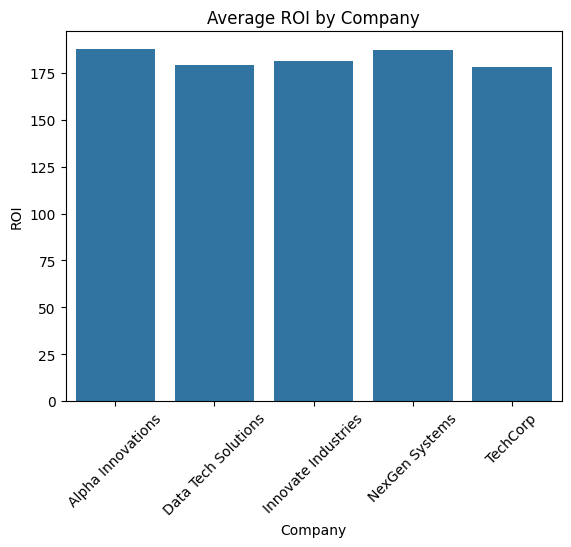

In [14]:
avg_roi_company = df.groupby('Company')['ROI'].mean().reset_index()

sns.barplot(data=avg_roi_company, x='Company', y='ROI')
plt.xticks(rotation=45)
plt.title('Average ROI by Company')
plt.show()

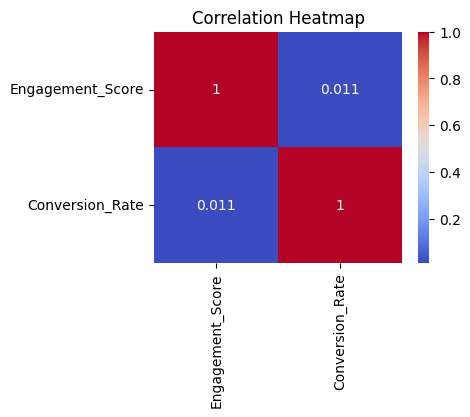

In [15]:
corrilation_data = df[['Engagement_Score', 'Conversion_Rate']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corrilation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

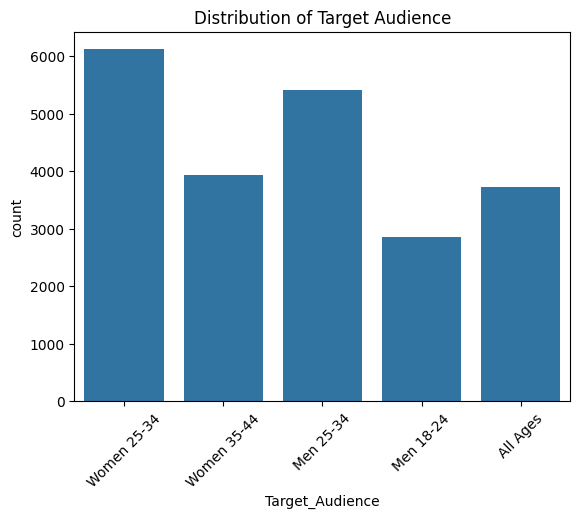

In [16]:
sns.countplot(data=df, x='Target_Audience')
plt.title('Distribution of Target Audience')
plt.xticks(rotation=45)
plt.show()

In [17]:
seg_lang_conversion = df.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().reset_index()

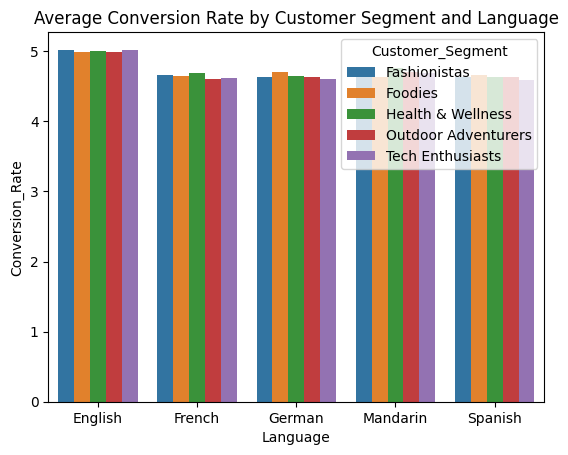

In [18]:
sns.barplot(data=seg_lang_conversion, x='Language', y='Conversion_Rate', hue='Customer_Segment')
plt.title('Average Conversion Rate by Customer Segment and Language')
plt.show()

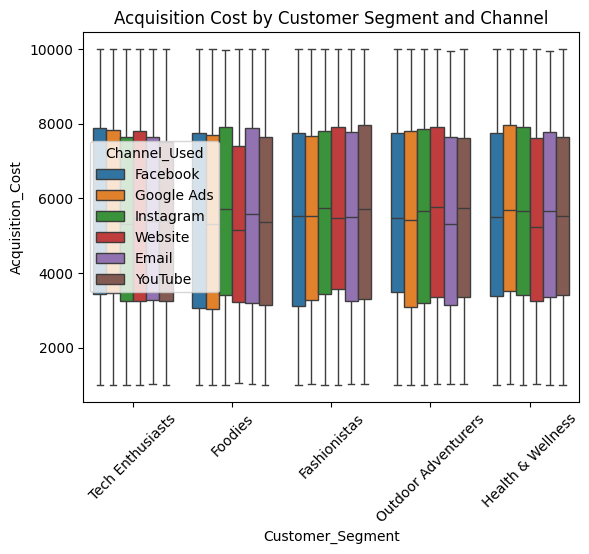

In [19]:
sns.boxplot(data=df, x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used')
plt.title('Acquisition Cost by Customer Segment and Channel')
plt.xticks(rotation=45)
plt.show()

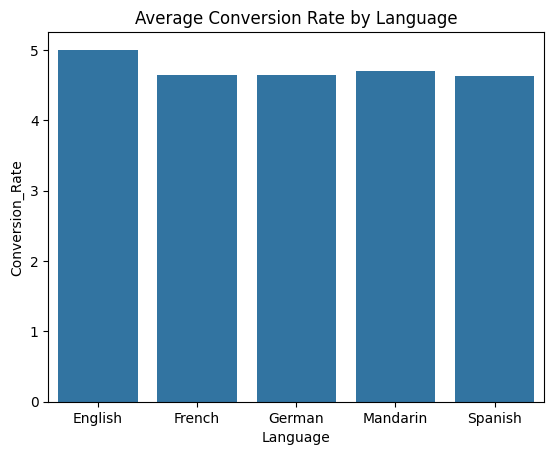

In [20]:
avg_conv_lang = df.groupby('Language')['Conversion_Rate'].mean().reset_index()

sns.barplot(data=avg_conv_lang, x='Language', y='Conversion_Rate')
plt.title('Average Conversion Rate by Language')
plt.show()

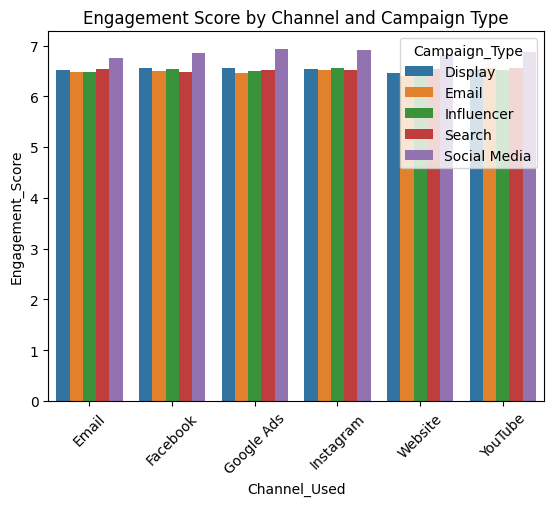

In [21]:
eng_channel_type = df.groupby(['Channel_Used', 'Campaign_Type'])['Engagement_Score'].mean().reset_index()

sns.barplot(data=eng_channel_type, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type')
plt.title('Engagement Score by Channel and Campaign Type')
plt.xticks(rotation=45)
plt.show()

In [22]:
roi_channel = df.groupby('Channel_Used')['ROI'].sum()

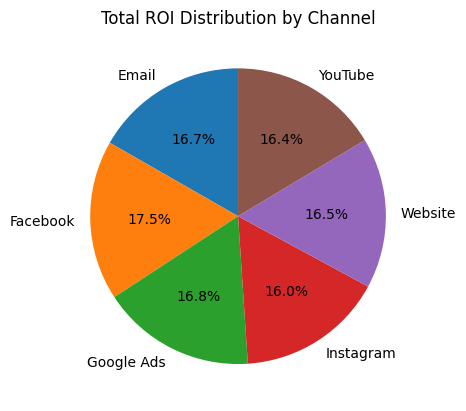

In [23]:
plt.pie(roi_channel, labels=roi_channel.index, autopct='%1.1f%%', startangle=90)
plt.title('Total ROI Distribution by Channel')
plt.show()

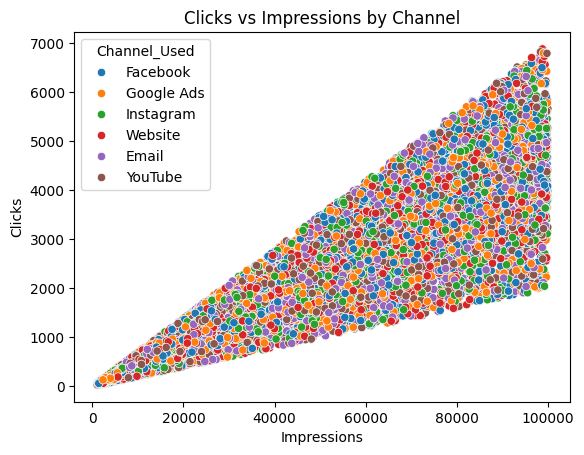

In [24]:
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Channel_Used')
plt.title('Clicks vs Impressions by Channel')
plt.show()

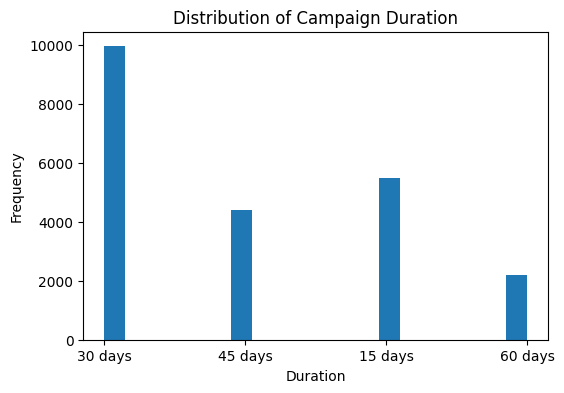

In [25]:
plt.figure(figsize=(6,4))
plt.hist(df['Duration'], bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Campaign Duration')
plt.show()

In [26]:
conv_time_company = df.groupby(['Date', 'Company'])['Conversion_Rate'].mean().reset_index()

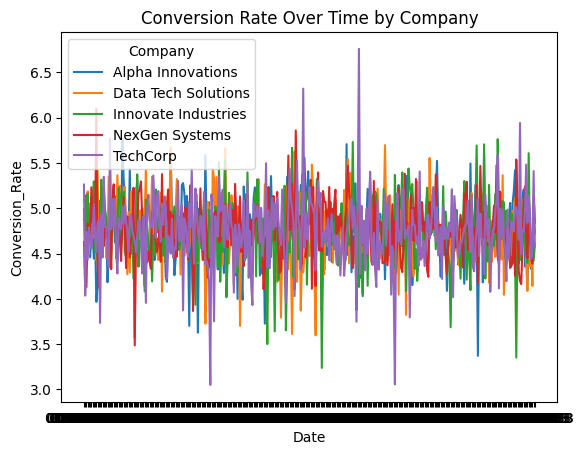

In [27]:
sns.lineplot(data=conv_time_company, x='Date', y='Conversion_Rate', hue='Company')
plt.title('Conversion Rate Over Time by Company')
plt.show()

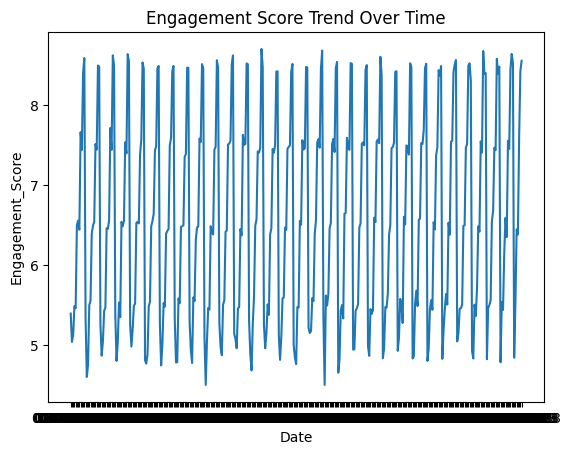

In [28]:
eng_time = df.groupby('Date')['Engagement_Score'].mean().reset_index()

sns.lineplot(data=eng_time, x='Date', y='Engagement_Score')
plt.title('Engagement Score Trend Over Time')
plt.show()

In [29]:
cost_location = df.groupby('Location')['Acquisition_Cost'].mean().reset_index()

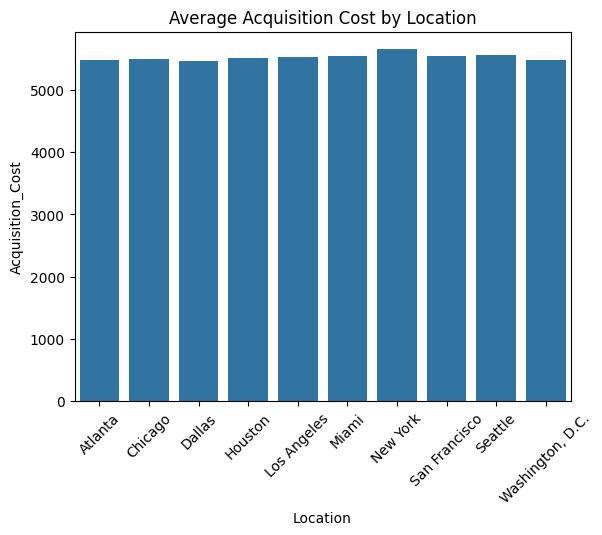

In [30]:
sns.barplot(data=cost_location, x='Location', y='Acquisition_Cost')
plt.xticks(rotation=45)
plt.title('Average Acquisition Cost by Location')
plt.show()

In [31]:
roi_location = df.groupby('Location')['ROI'].sum()

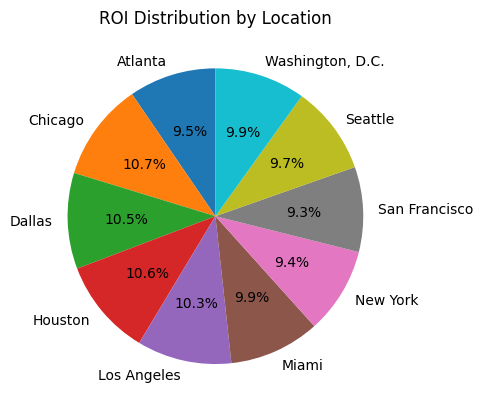

In [32]:
plt.pie(roi_location, labels=roi_location.index, autopct='%1.1f%%', startangle=90)
plt.title('ROI Distribution by Location')
plt.show()